In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from datetime import datetime



In [82]:
%pip install pandas 
%pip install matplotlib.pyplot 
%pip install t seaborn 
%pip install numpy
%pip install yfinance 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement t (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for t
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated 

In [83]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/BTC.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/S&P500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/XAU(GOLD).csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
#df_btc.set_index('Date', inplace=True)
#df_sp500.set_index('Date', inplace=True)
#df_gold.set_index('Date', inplace=True)


In [84]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
                                Date     Close/Last  Volume           Open  \
count                           1883    1883.000000     0.0    1883.000000   
mean   2022-01-16 23:28:38.746680832   34040.240998     NaN   34020.393840   
min              2019-03-08 00:00:00    3864.900000     NaN    3864.600000   
25%              2020-08-26 12:00:00   11361.600000     NaN   11368.050000   
50%              2021-12-10 00:00:00   28285.600000     NaN   28203.900000   
75%              2023-03-29 12:00:00   50395.100000     NaN   50709.850000   
max              2025-02-09 00:00:00  106484.000000     NaN  106504.000000   
std                              NaN   24396.582505     NaN   24382.936974   

               High            Low  
count    1883.00000    1883.000000  
mean    34367.86240   33718.551832  
min      3894.70000    3810.700000  
25%     11408.80000   11229.700000  
50%     28460.30000   28109.200000  
75%     51436.25000   49898.250000  
m

In [85]:
df_btc.head()

,Date,Close/Last,Volume,Open,High,Low
0,2025-02-09,96852.7,NaN,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,NaN,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,NaN,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,NaN,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,NaN,98042.5,97824.0,96510.6


In [86]:
df_btc=df_btc.drop(columns=["Volume"],axis=1)
df_gold=df_gold.drop(columns=["Volume"],axis=1)

In [87]:
df_btc.head()

,Date,Close/Last,Open,High,Low
0,2025-02-09,96852.7,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,98042.5,97824.0,96510.6


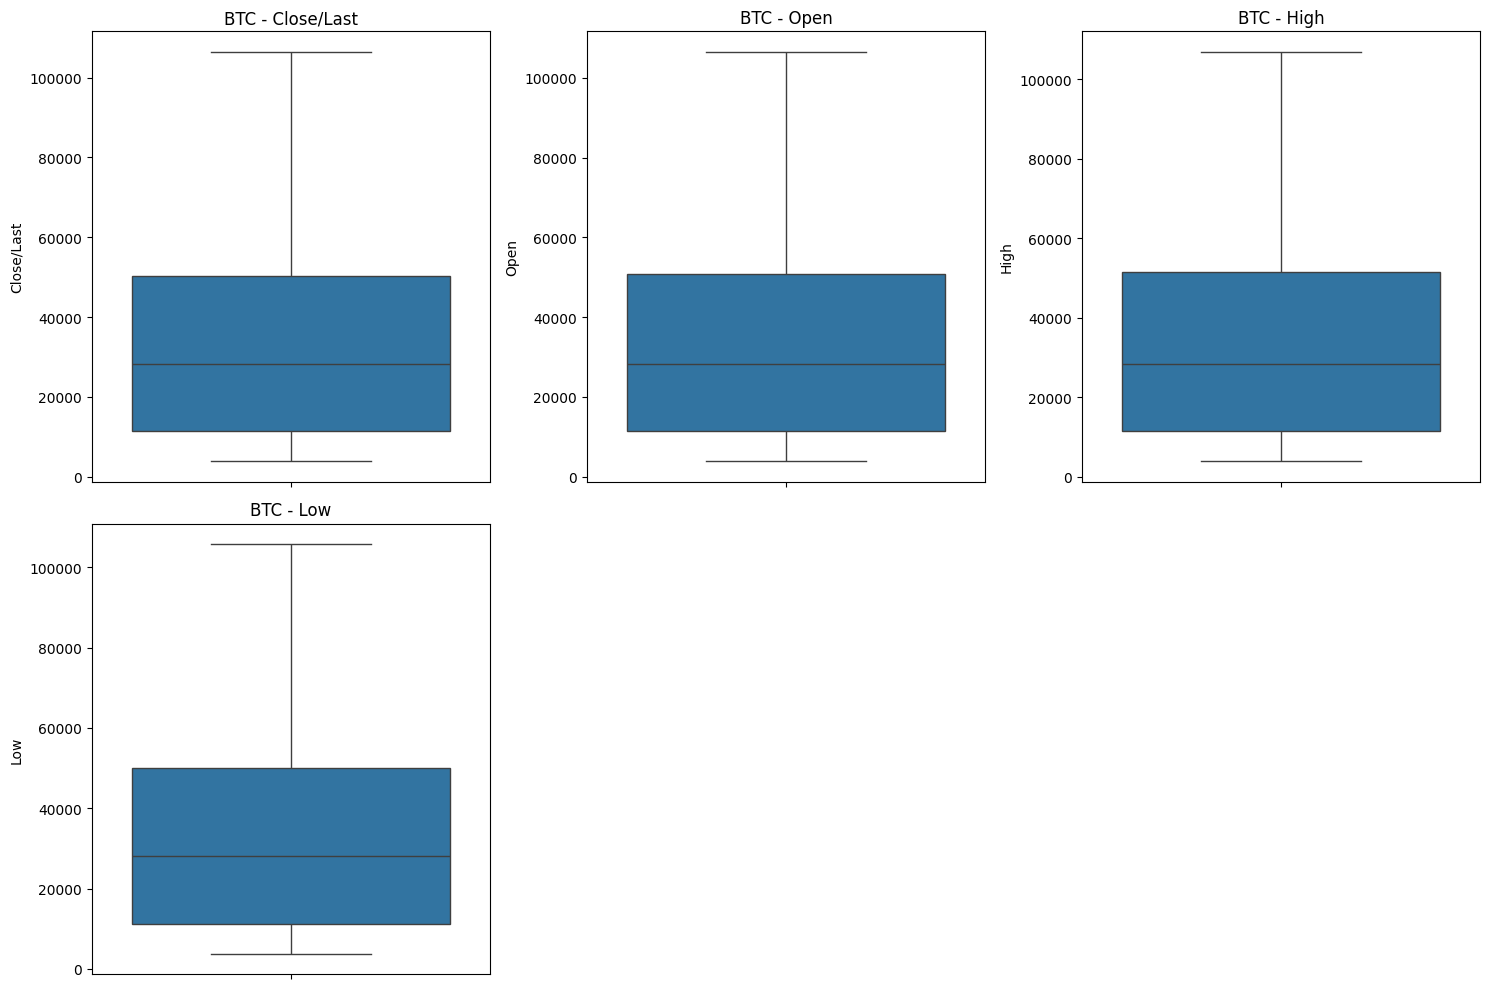

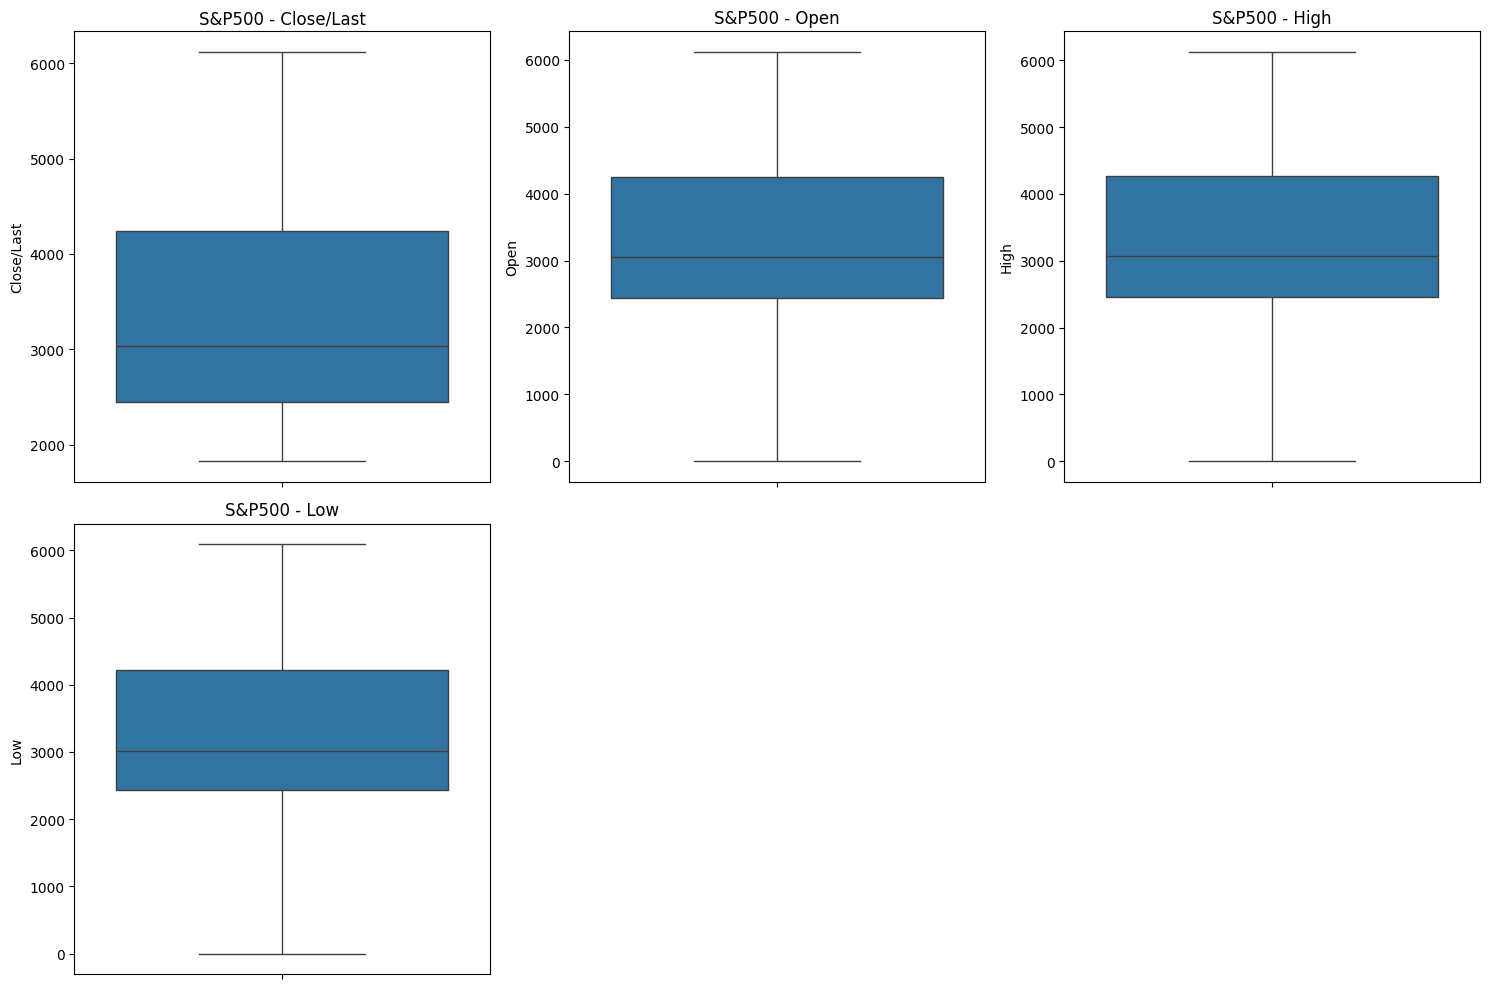

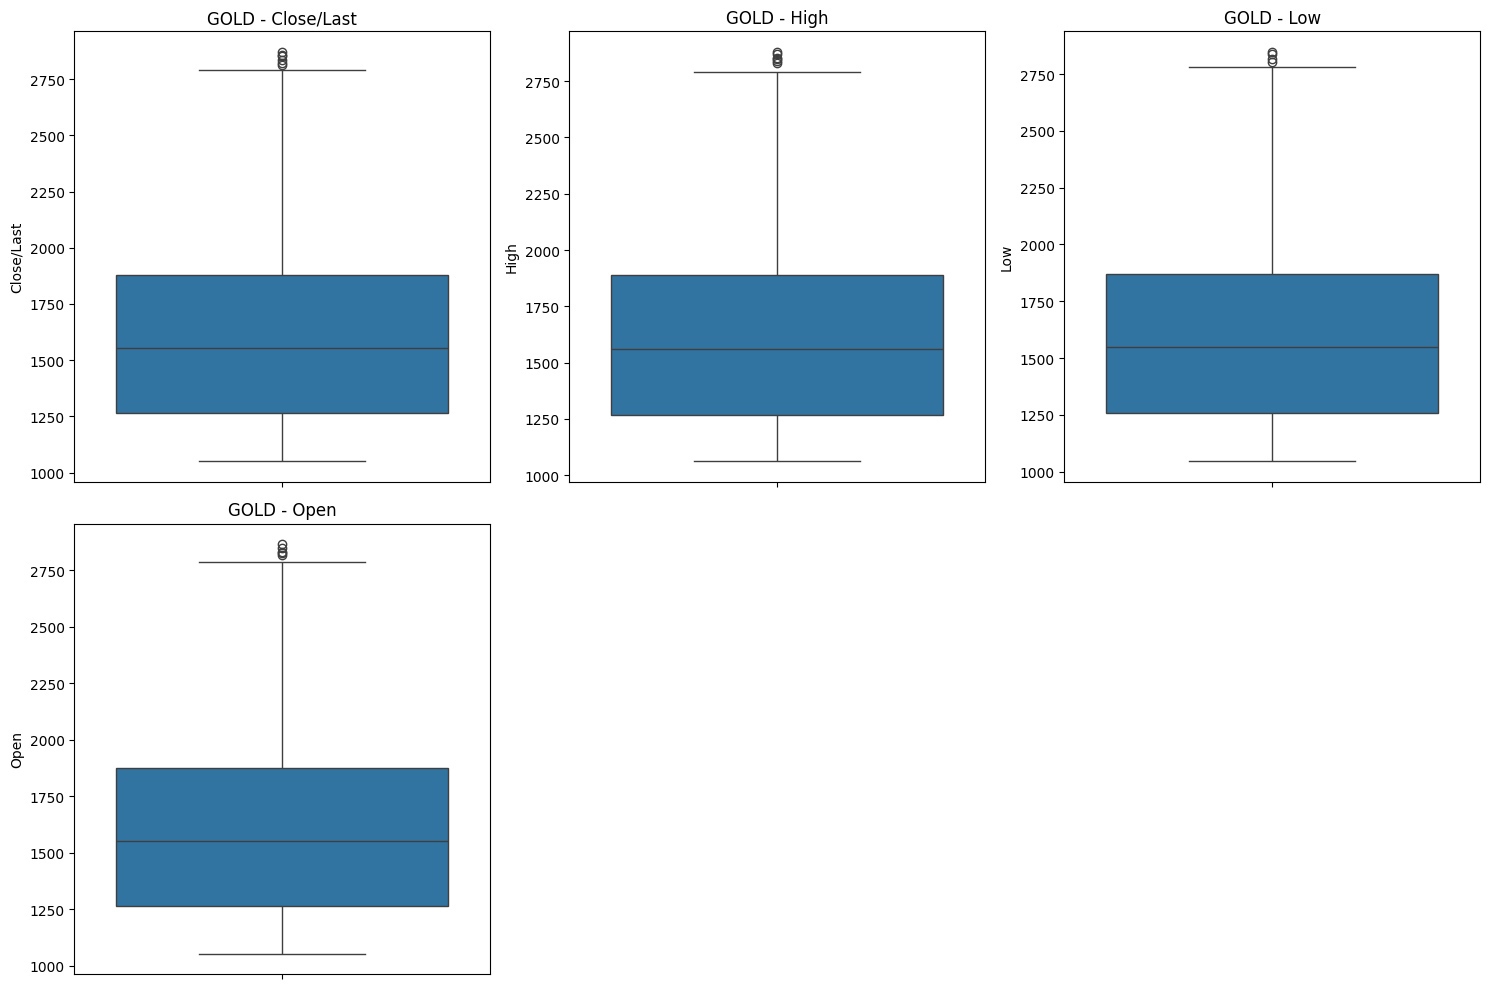

In [88]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [89]:
df_sp500 = df_sp500[~((df_sp500.iloc[:, -3:] == 0.00).all(axis=1))]
print(df_sp500.head())
print("Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !")

        Date  Close/Last     Open     High      Low
0 2025-02-07     6025.99  6083.13  6101.28  6019.96
1 2025-02-06     6083.57  6072.22  6084.03  6046.83
2 2025-02-05     6061.48  6020.45  6062.86  6007.06
3 2025-02-04     6037.88  5998.14  6042.48  5990.87
4 2025-02-03     5994.57  5969.65  6022.13  5923.93
Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !


In [90]:
# Correction des dates pour df_btc
df_btc["Date"] = pd.to_datetime(df_btc["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Correction des dates pour df_sp500
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Vérification après conversion
print(df_btc.head())
print(df_sp500.head())

print("✅ Les dates ont été converties au format JJ/MM/AAAA !")


         Date  Close/Last     Open     High      Low
0  09/02/2025     96852.7  96218.7  97297.8  96369.0
1  08/02/2025     96623.3  95981.2  96862.8  95716.1
2  07/02/2025     96402.1  97460.6  96862.8  96237.1
3  06/02/2025     97467.5  97623.4  97872.2  96424.2
4  05/02/2025     97631.2  98042.5  97824.0  96510.6
         Date  Close/Last     Open     High      Low
0  07/02/2025     6025.99  6083.13  6101.28  6019.96
1  06/02/2025     6083.57  6072.22  6084.03  6046.83
2  05/02/2025     6061.48  6020.45  6062.86  6007.06
3  04/02/2025     6037.88  5998.14  6042.48  5990.87
4  03/02/2025     5994.57  5969.65  6022.13  5923.93
✅ Les dates ont été converties au format JJ/MM/AAAA !


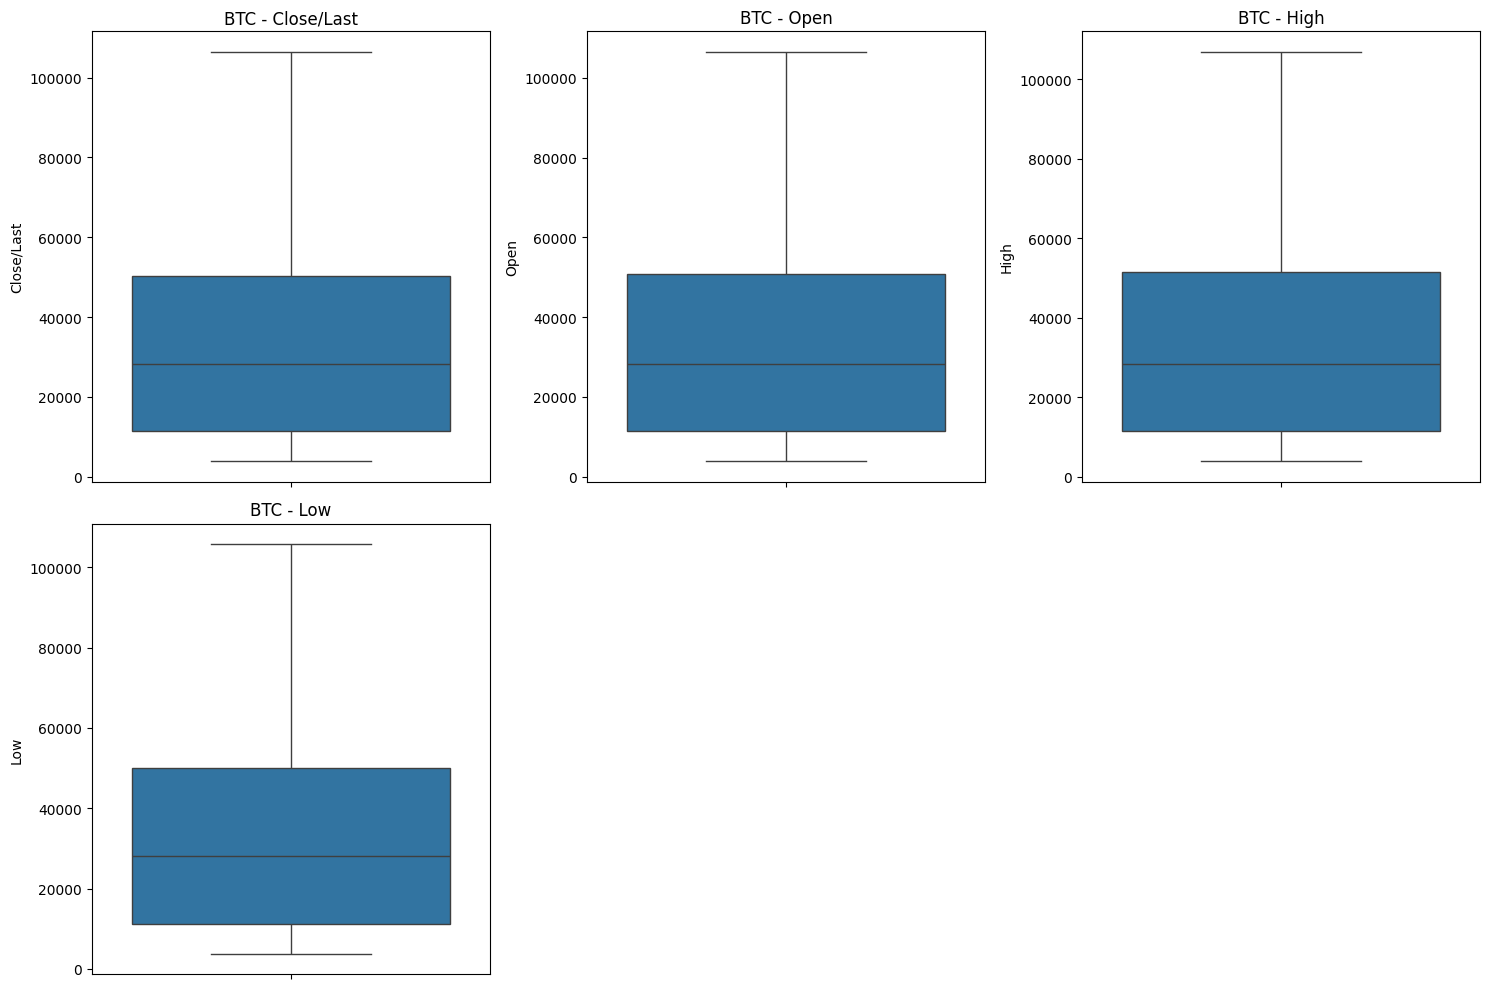

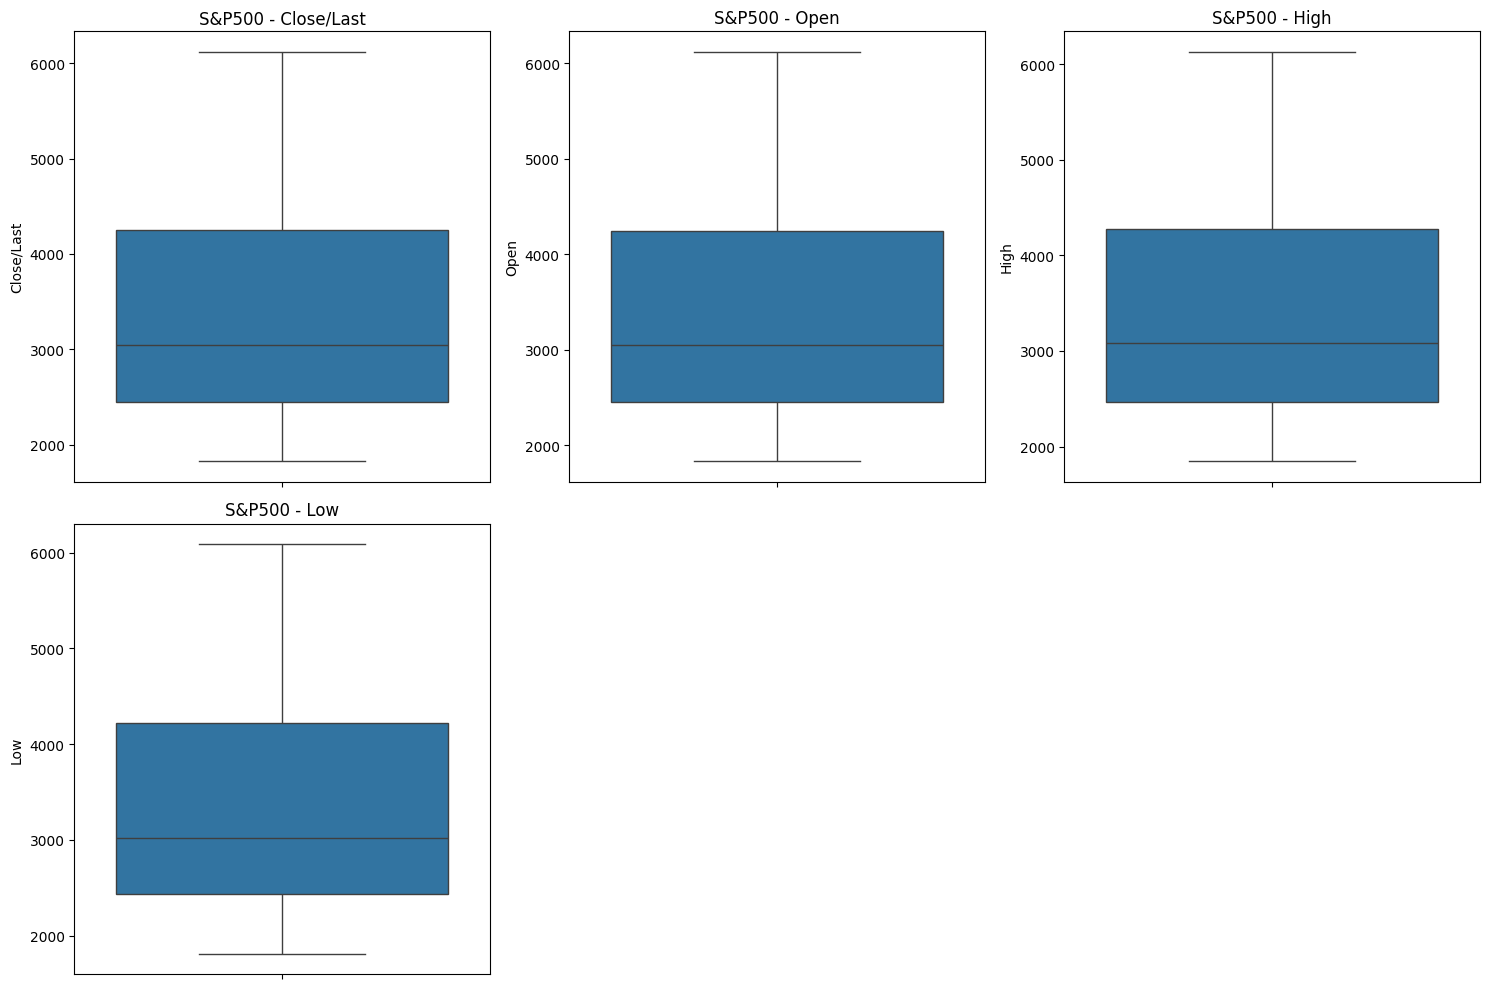

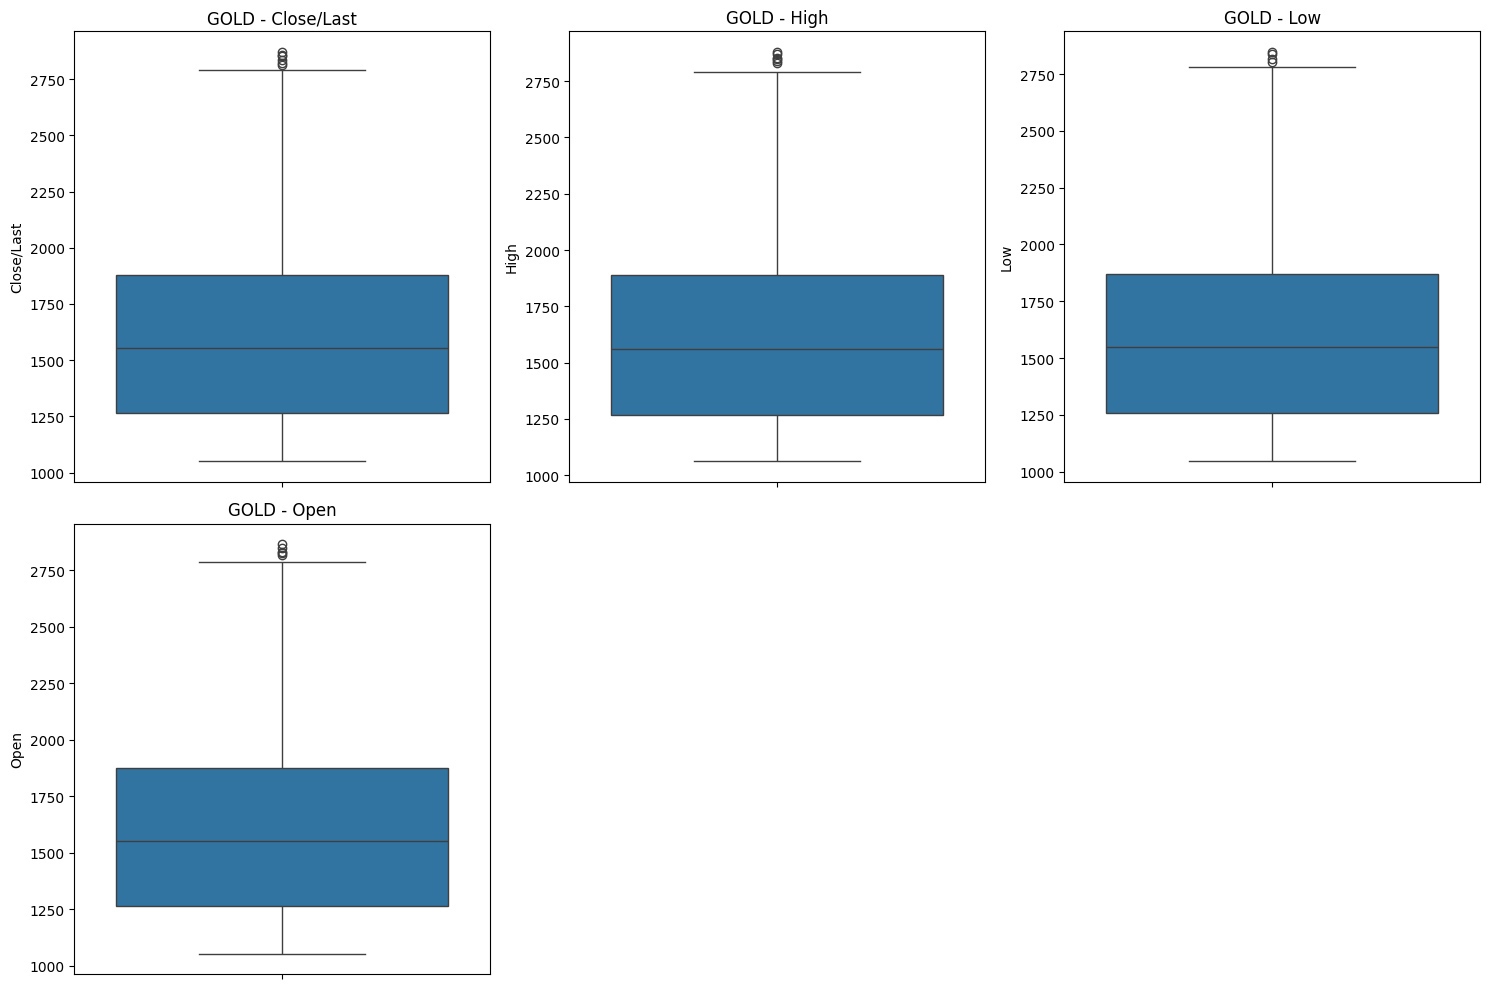

In [91]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [92]:
import matplotlib.pyplot as plt

In [93]:
for df in [df_btc, df_sp500, df_gold]:
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)  # Correction du format
    else:
        print("⚠️ La colonne 'Date' est absente de ce dataset :", df.columns)

        Date  BTC_Close  BTC_Open  BTC_High   BTC_Low  SP500_Close  \
0 2025-02-06    97467.5   97623.4   97872.2   96424.2      6083.57   
1 2025-02-05    97631.2   98042.5   97824.0   96510.6      6061.48   
2 2025-02-04    98213.4  100069.0   98890.5   97183.6      6037.88   
3 2025-02-03   100151.0   92749.8  101693.0  100151.0      5994.57   
4 2025-01-31   102381.0  104005.0  102771.0  102138.0      6040.53   

   SP500_Open  SP500_High  SP500_Low   Gold_Close    Gold_High     Gold_Low  \
0     6072.22     6084.03    6046.83  2856.000000  2871.699951  2836.300049   
1     6020.45     6062.86    6007.06  2871.600098  2880.500000  2848.000000   
2     5998.14     6042.48    5990.87  2853.300049  2853.300049  2816.100098   
3     5969.65     6022.13    5923.93  2833.899902  2848.399902  2780.899902   
4     6096.79     6120.91    6030.93  2812.500000  2838.000000  2804.000000   

     Gold_Open  
0  2865.199951  
1  2850.000000  
2  2827.600098  
3  2818.199951  
4  2829.000000  


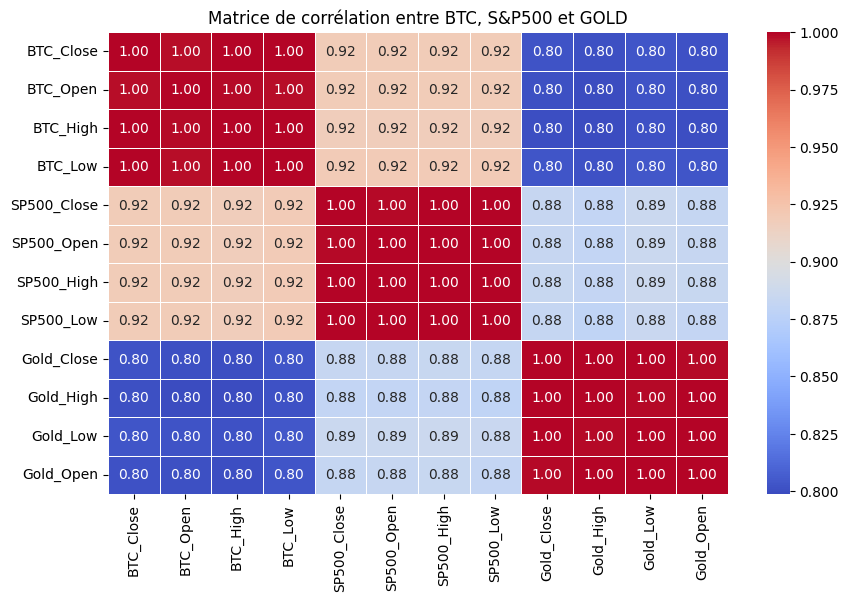

In [94]:
# ✅ Renommer les colonnes pour éviter les conflits après fusion
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Fusionner les datasets sur la colonne "Date"
df_merged = df_btc.merge(df_sp500, on="Date").merge(df_gold, on="Date")

# ✅ Vérification des données après fusion
print(df_merged.head())

# ✅ Sélectionner uniquement les colonnes numériques pour la corrélation
df_corr = df_merged.drop(columns=["Date"])

# ✅ Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# ✅ Affichage avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre BTC, S&P500 et GOLD")
plt.show()


In [95]:
# ✅ Vérification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    # Dictionnaire des nouveaux noms des colonnes pour chaque actif
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    # Vérifier si l'asset est dans le dictionnaire
    if asset_name in price_columns:
        price_col = price_columns[asset_name]  # Récupère le bon nom de colonne
    else:
        print(f"⚠️ Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  # Retourne None pour price_col et le DataFrame inchangé

    # Vérifier si la colonne existe dans le DataFrame
    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return None, df  # Retourne None pour éviter les erreurs

    print(f"✅ La colonne '{price_col}' est bien trouvée pour {asset_name}.")
    return price_col, df  # Retourne le nom correct de la colonne et le DataFrame

# ✅ Calcul des rendements
def compute_returns(df, asset_name):
    df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date en datetime
    df = df.sort_values("Date")  # Trier les données par date
    df = df.set_index("Date")  # Définir la colonne Date comme index

    # Vérifier et récupérer la colonne de prix
    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  # Si la colonne n'est pas trouvée, arrêter l'exécution
        return df  

    # Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # Affichage des rendements moyens
    print(f"\n📊 Rendements moyens pour {asset_name}:")
    print(f"✅ Quotidien: {df['Daily Return'].mean():.4%}")
    print(f"✅ Mensuel: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Annuel: {df['Annual Return'].mean():.4%}")

    return df


In [96]:
# Charger les fichiers avec les bons chemins
#btc_df = pd.read_csv("../CSV/BTC.csv")
#sp500_df = pd.read_csv(sp500_df = pd.read_csv(r"/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/CSV/S&P500.csv")
#gold_df = pd.read_csv("../CSV/XAU(GOLD).csv")

# Appliquer la fonction à chaque actif
df_btc = compute_returns(df_btc, "BTC")
df_sp500 = compute_returns(df_sp500, "SP500")
df_gold = compute_returns(df_gold, "GOLD")

✅ La colonne 'BTC_Close' est bien trouvée pour BTC.

📊 Rendements moyens pour BTC:
✅ Quotidien: 0.2611%
✅ Mensuel: 8.5970%
✅ Annuel: 129.4423%
✅ La colonne 'SP500_Close' est bien trouvée pour SP500.

📊 Rendements moyens pour SP500:
✅ Quotidien: 0.0489%
✅ Mensuel: 0.9483%
✅ Annuel: 17.8203%
✅ La colonne 'Gold_Close' est bien trouvée pour GOLD.

📊 Rendements moyens pour GOLD:
✅ Quotidien: 0.0389%
✅ Mensuel: 0.7339%
✅ Annuel: 13.0659%


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_16107/2905150555.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_16107/2905150555.py:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_16107/2905150555.py:39: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_16107/2905150555.py:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y')

In [97]:
# Générer une série de rendements quotidiens simulés
np.random.seed(42)  # Assurer la reproductibilité
returns = np.random.randn(252) / 100  # Rendements quotidiens simulés sur 252 jours

# Convertir en DataFrame
data = pd.DataFrame({'daily_return': returns})

# Calcul de la volatilité quotidienne (écart-type des rendements)
volatility_daily = data['daily_return'].std()

# Calcul de la volatilité annuelle
trading_days = 252  # Nombre de jours de trading dans l'année
volatility_annual = volatility_daily * np.sqrt(trading_days)

# Affichage des résultats
print(f"Volatilité Quotidienne: {volatility_daily:.6f}")
print(f"Volatilité Annuelle: {volatility_annual:.6f}")


Volatilité Quotidienne: 0.009672
Volatilité Annuelle: 0.153541


In [106]:
#Définition des actifs et de leurs périodes (format JJ/MM/AAAA pour affichage)
assets = {
    "S&P 500": ("^GSPC", "02/10/2015", "02/07/2025"),
    "Bitcoin": ("BTC-USD", "03/08/2019", "02/09/2025"),
    "Gold": ("GC=F", "02/10/2015", "02/07/2025"),
}

# Taux sans risque annualisé (2%)
risk_free_rate = 0.02

# Fonction pour convertir JJ/MM/AAAA → YYYY-MM-DD (pour yfinance)
def convert_date_to_yfinance(date_str):
    return datetime.strptime(date_str, "%d/%m/%Y").strftime("%Y-%m-%d")

def sharpe_ratio(asset, start, end, risk_free_rate):
    try:
        # Conversion en YYYY-MM-DD pour yfinance
        start_yf, end_yf = convert_date_to_yfinance(start), convert_date_to_yfinance(end)  
        print(f"📥 Téléchargement de {asset} de {start} à {end}")  # JJ/MM/AAAA pour affichage

        data = yf.download(asset, start=start_yf, end=end_yf, progress=False)["Close"].dropna()
        
        if data.empty:
            print(f"⚠️ Pas de données pour {asset}. Vérifiez les dates.")
            return None
        
        returns = data.pct_change().dropna()  # Rendements quotidiens
        excess_returns = returns - (risk_free_rate / 252)  # Ajusté au taux sans risque journalier
        
        mean_return = np.mean(excess_returns)
        std_dev = np.std(excess_returns, ddof=1)
        
        if std_dev == 0:
            print(f"⚠️ Volatilité nulle pour {asset}, impossible de calculer le ratio de Sharpe.")
            return None

        sharpe = mean_return / std_dev * np.sqrt(252)
        return round(sharpe, 2)  # Arrondi à 2 décimales
    except Exception as e:
        print(f"❌ Erreur lors du téléchargement des données pour {asset}: {e}")
        return None

# Calcul des ratios de Sharpe
sharpe_ratios = {name: sharpe_ratio(symbol, start, end, risk_free_rate) 
                 for name, (symbol, start, end) in assets.items()}

# Affichage des résultats
for asset, sharpe in sharpe_ratios.items():
    if sharpe is not None:
        print(f"✅ Sharpe Ratio de {asset}: {sharpe}")

📥 Téléchargement de ^GSPC de 02/10/2015 à 02/07/2025
❌ Erreur lors du téléchargement des données pour ^GSPC: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
📥 Téléchargement de BTC-USD de 03/08/2019 à 02/09/2025


/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


❌ Erreur lors du téléchargement des données pour BTC-USD: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
📥 Téléchargement de GC=F de 02/10/2015 à 02/07/2025
❌ Erreur lors du téléchargement des données pour GC=F: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# ✅ Définition des noms de fichiers
btc_filename = "df_btc.csv"
sp500_filename = "df_sp500.csv"
gold_filename = "df_gold.csv"

# ✅ Enregistrer les DataFrames en CSV
df_btc.to_csv(btc_filename, index=False)
df_sp500.to_csv(sp500_filename, index=False)
df_gold.to_csv(gold_filename, index=False)

print(f"✅ Fichiers enregistrés : {btc_filename}, {sp500_filename}, {gold_filename}")